In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bq_helper

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
github_repos = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", dataset_name = "github_repos")
github_repos.list_tables()
type(github_repos)

Using Kaggle's public dataset BigQuery integration.


bq_helper.BigQueryHelper

In [20]:
github_repos.table_schema("sample_contents")

,name,type,mode,description
0,id,STRING,NULLABLE,None
1,size,INTEGER,NULLABLE,None
2,content,STRING,NULLABLE,None
3,binary,BOOLEAN,NULLABLE,None
4,copies,INTEGER,NULLABLE,None
5,sample_repo_name,STRING,NULLABLE,None
6,sample_ref,STRING,NULLABLE,None
7,sample_path,STRING,NULLABLE,None
8,sample_mode,INTEGER,NULLABLE,None
9,sample_symlink_target,STRING,NULLABLE,None


In [21]:
github_repos.head("sample_contents", num_rows=3)

,id,size,content,binary,copies,sample_repo_name,sample_ref,sample_path,sample_mode,sample_symlink_target
0,cbadcd57167b3b6f1448f4bc2e4173ee26447997,856,// Utility.cs\n//\n\nusing System;\nusing Syst...,False,2,nikhilk/scriptsharp,refs/heads/cc,samples/AroundMe/AroundMe/Core/Utility.cs,33188,None
1,37a696da20b4d08d37d684b5e4326dc901cf16d1,733845,\n/* lua_debugger.c */\n\n#if __cplusplus\next...,False,14,cocos2d/cocos2d-x-samples,refs/heads/v3,samples/FantasyWarrior3D/frameworks/runtime-sr...,33188,None
2,010b9edcb9a0b6f3546684a786076fab0016ae95,4907,/*\n* Copyright (c) 2006-2010 Erin Catto http:...,False,310,cocos2d/cocos2d-x-samples,refs/heads/v3,samples/SwiftTetris/cocos2d/external/Box2D/Col...,33188,None


In [22]:
query1= """SELECT content, sample_path
            FROM `bigquery-public-data.github_repos.sample_contents`
            WHERE LENGTH(content) > 100 AND LENGTH(content) <= 1000 AND binary = False
        """
contents = github_repos.query_to_pandas_safe(query1, max_gb_scanned=24)
contents.head()

,content,sample_path
0,import _ from 'lodash';\nimport getOne from '....,lib/modules/fields/utils/get_many.js
1,// Mixins\n// --------------------------\n\nfa...,themes/lattice/source/css/font_awesome/mixins....
2,"<div class=""row-fluid"">\n <div class=""span6...",application/views/dashboard/index-tabs/ixps.phtml
3,<?php\n\nuse Illuminate\Contracts\Auth\Guard;\...,tests/Loggable/LoggableExtensionTest.php
4,"{\n ""name"": ""arbiter/arbiter"",\n ""type"":...",composer.json


In [23]:
contents.shape

(681918, 2)

In [24]:
def file_ext(path):
    path = str(path)
    try:
        file_extension = path.rpartition('.')[2]
    except IndexError:
        file_extension = 'null'  ## Ihe the path has no '.'
    return(file_extension)
    
file_ext("example.ipyb")

'ipyb'

In [25]:
contents['ext'] = contents.apply(lambda x: file_ext(x['sample_path']),axis=1)
contents.head(10)

,content,sample_path,ext
0,import _ from 'lodash';\nimport getOne from '....,lib/modules/fields/utils/get_many.js,js
1,// Mixins\n// --------------------------\n\nfa...,themes/lattice/source/css/font_awesome/mixins....,styl
2,"<div class=""row-fluid"">\n <div class=""span6...",application/views/dashboard/index-tabs/ixps.phtml,phtml
3,<?php\n\nuse Illuminate\Contracts\Auth\Guard;\...,tests/Loggable/LoggableExtensionTest.php,php
4,"{\n ""name"": ""arbiter/arbiter"",\n ""type"":...",composer.json,json
5,# encoding: utf-8\n# Copyright 2011 Tree.io Li...,treeio/messaging/widgets.py,py
6,<?php\nclass DryRunCest\n{\n public functio...,tests/cli/DryRunCest.php,php
7,﻿using System;\nusing SmartStore.Core;\n\nname...,SmartStore.MailChimp/Data/MailChimpEventQueueR...,cs
8,<?php\nnamespace Aura\Filter\Rule\Sanitize;\n\...,tests/Rule/Sanitize/StrlenTest.php,php
9,"<?xml version=""1.0"" ?>\n\n<!-- \n\tEPM citatio...",lib/citations/epm/default.xml,xml


In [26]:
del contents['sample_path']
contents.to_csv("sample_code.csv", index=False)

In [27]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import eli5

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
sample_code = pd.read_csv("sample_code.csv",lineterminator='\n')  
sample_code.head()

,content,ext
0,import _ from 'lodash';\nimport getOne from '....,js
1,// Mixins\n// --------------------------\n\nfa...,styl
2,"<div class=""row-fluid"">\n <div class=""span6...",phtml
3,<?php\n\nuse Illuminate\Contracts\Auth\Guard;\...,php
4,"{\n ""name"": ""arbiter/arbiter"",\n ""type"":...",json


In [29]:
sample_code.describe()

,content,ext
count,681918,681912
unique,681917,33583
top,"street_name_no,plz,city,attr1,geom_wkt,geom\n""...",js
freq,2,49464


In [34]:
type_counts = sample_code['ext'].value_counts().reset_index()
type_counts

,index,ext
0,js,49464
1,java,39064
2,json,33010
3,xml,31016
4,h,30287
...,...,...
33578,metadata/md5-cache/app-emacs/twittering-mode-9999,1
33579,sandbox/recommendation/Makefile,1
33580,spree_bootstrap/frontend/bin/rails,1
33581,books/GNUmakefile,1


In [35]:
top_languages = type_counts[type_counts['ext'] >= 20000]
top_languages

,index,ext
0,js,49464
1,java,39064
2,json,33010
3,xml,31016
4,h,30287
5,php,27012
6,txt,25966
7,rb,23008
8,cs,22891
9,html,22273


<AxesSubplot:xlabel='index', ylabel='ext'>

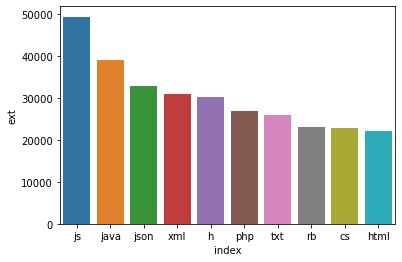

In [37]:
sns.barplot(data=top_languages, x='index', y='ext')

In [38]:
train = sample_code[sample_code['ext'].isin(top_languages['index'].values)]
print(train.shape)
train.head()

(303991, 2)


,content,ext
0,import _ from 'lodash';\nimport getOne from '....,js
3,<?php\n\nuse Illuminate\Contracts\Auth\Guard;\...,php
4,"{\n ""name"": ""arbiter/arbiter"",\n ""type"":...",json
6,<?php\nclass DryRunCest\n{\n public functio...,php
7,﻿using System;\nusing SmartStore.Core;\n\nname...,cs


In [39]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(train['content'], train['ext'], test_size=0.25)
print(len(xtrain),len(xtest) )

227993 75998


In [40]:
vec = TfidfVectorizer(max_df = 0.6, min_df = 0.01, max_features = 10000, analyzer = 'word', 
                      use_idf=True, token_pattern=r'\w{1,}')
clf = linear_model.SGDClassifier(loss = 'log', max_iter=50, tol=1e-3) 
pipe = make_pipeline(vec, clf)
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.6, max_features=10000, min_df=0.01,
                                 token_pattern='\\w{1,}')),
                ('sgdclassifier', SGDClassifier(loss='log', max_iter=50))])

In [41]:
ypred = pipe.predict(xtest)
report = metrics.classification_report(ytest, ypred)
print(report)
print("accuracy: {:0.2f}".format(metrics.accuracy_score(ytest, ypred)))
print("F1-score (weighted): {:0.2f}".format(metrics.f1_score(ytest, ypred, average = 'weighted')))

              precision    recall  f1-score   support

          cs       0.98      0.95      0.96      5683
           h       0.95      0.96      0.96      7587
        html       0.89      0.89      0.89      5592
        java       0.94      0.99      0.96      9745
          js       0.91      0.93      0.92     12421
        json       0.85      0.85      0.85      8363
         php       0.96      0.91      0.94      6691
          rb       0.97      0.93      0.95      5686
         txt       0.75      0.78      0.76      6517
         xml       0.93      0.90      0.91      7713

    accuracy                           0.91     75998
   macro avg       0.91      0.91      0.91     75998
weighted avg       0.91      0.91      0.91     75998

accuracy: 0.91
F1-score (weighted): 0.91


In [42]:
eli5.show_weights(clf, vec=vec, top=10)

In [43]:
#Get misclassified examples
val = pd.concat([xtest, ytest], axis=1)
val['pred'] = ypred
print(val.head(10))

                                                  content   ext  pred
87230   {\n    "_name": "Dialog",\n    "title": "prope...  json  json
320373  #import <UIKit/UIKit.h>\n\n\nFOUNDATION_EXPORT...     h     h
668669  /*\n * This file is part of the libstm8 projec...     h     h
135256  import { Observable } from 'rxjs';\n\nObservab...    js    js
425474  <?php\n\n/**\n * This file is part of the auth...   php   php
567217  Sunny;JSPJohn Smith3406062006\r\nWeblea;JSPJoh...   txt  json
415209  package org.nutz.ioc.val;\n\nimport org.nutz.i...  java  java
192461  package com.microsoft.bingads.v10.api.test.ope...  java  java
91588   Thank you for installing FileBrowser.\n\nMind ...   txt   txt
187277  /**\r\n * <copyright>\r\n * </copyright>\r\n *...  java  java


In [45]:
misclassified_examples = val[val.ext != val.pred]
misclassified_examples.sample(10)

,content,ext,pred
435176,﻿/*\n * PLUGIN RUTRACKER_CHECK\n *\n * Polish ...,js,rb
275920,"{\n ""type"": ""message"",\n ""data"": [\n ""{25...",json,txt
452325,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",xml,html
482152,.. _favorite:\n\n收藏夹 API\n====================...,txt,js
166252,"[""Achadinha"",""Biscainhos"",""Cha de Dentro"",""Lap...",json,txt
47531,.. index:: label\n\nlabel command\n===========...,txt,html
673468,"Proj4js.defs[""EPSG:26822""] = ""+proj=lcc +lat_1...",js,txt
12486,The Meursing code for a product with this comp...,txt,js
596255,"{\n ""peer"": {\n ""_constructor"": ""inputNoti...",json,txt
53135,"Package.describe({\n summary: ""contains a cor...",js,json


In [ ]:
eli5.show_prediction(clf, misclassified_examples['content'].values[1], vec=vec)